## Pizza Sales Project

In [2]:
""" 1. total sales
    2. identify which pizza is ordered the most ?
    3. Identify which pizza is generating more sales ?
    4. Identify which pizza category is hotselling ?
    5. identify the time at which we are getting high orders and the time at which we are getting the lowest orders ?
    6. identify which day of the week we are getting the most orders.
    7. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)."""
print("pizza sales project")

pizza sales project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns


In [3]:
orders = pd.read_csv("orders.csv")
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [9]:
orders["date"] = pd.to_datetime(orders["date"])


In [10]:
orders["time"] = pd.to_datetime(orders["time"])

In [12]:
orders

,order_id,date,time
0,1,2015-01-01,2023-12-05 11:38:36
1,2,2015-01-01,2023-12-05 11:57:40
2,3,2015-01-01,2023-12-05 12:12:28
3,4,2015-01-01,2023-12-05 12:16:31
4,5,2015-01-01,2023-12-05 12:21:30
...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07
21346,21347,2015-12-31,2023-12-05 21:14:37
21347,21348,2015-12-31,2023-12-05 21:23:10
21348,21349,2015-12-31,2023-12-05 22:09:54


In [13]:
od = pd.read_csv("order_details.csv")
od

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [14]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
pizza = pd.read_csv("pizzas.csv")
pizza

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [17]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [18]:
pt = pd.read_csv("pizza_types.csv",encoding= 'unicode_escape')
pt

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [19]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


 # total sales 

In [21]:
# 3. total sales 
df  = pd.merge(left = pizzas,right = od, on="pizza_id", how = "inner")
df


,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1
...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,48341,21230,1
48616,veggie_veg_l,veggie_veg,L,20.25,48452,21278,1
48617,veggie_veg_l,veggie_veg,L,20.25,48523,21305,1
48618,veggie_veg_l,veggie_veg,L,20.25,48548,21317,1


In [22]:
df["amount"] = df["price"]*df["quantity"]
df

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,amount
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75
...,...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,48341,21230,1,20.25
48616,veggie_veg_l,veggie_veg,L,20.25,48452,21278,1,20.25
48617,veggie_veg_l,veggie_veg,L,20.25,48523,21305,1,20.25
48618,veggie_veg_l,veggie_veg,L,20.25,48548,21317,1,20.25


In [25]:
total_sales =df["amount"].sum()
total_sales

817860.05

In [26]:
print("total sales generated is:",total_sales)

total sales generated is: 817860.05


# most ordered pizza

In [27]:
 # Que2 identify which pizza is ordered the most ?

In [31]:
df1 = pd.merge(left = df,right = pt, on="pizza_type_id", how = "inner")
df1

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,amount,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
...,...,...,...,...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,48341,21230,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48616,veggie_veg_l,veggie_veg,L,20.25,48452,21278,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48617,veggie_veg_l,veggie_veg,L,20.25,48523,21305,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48618,veggie_veg_l,veggie_veg,L,20.25,48548,21317,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [33]:
gb = df1.groupby("name").agg({"order_details_id":"count"}) 
gb

,order_details_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [36]:
mo = gb["order_details_id"].idxmax()
print("the most ordered pizza is:",mo)

the most ordered pizza is: The Classic Deluxe Pizza


## Best Selling Pizza

In [ ]:
# Que3 Identify which pizza is generating more sales ?

In [37]:
df1

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,amount,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
...,...,...,...,...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,48341,21230,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48616,veggie_veg_l,veggie_veg,L,20.25,48452,21278,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48617,veggie_veg_l,veggie_veg,L,20.25,48523,21305,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48618,veggie_veg_l,veggie_veg,L,20.25,48548,21317,1,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [38]:
gb1 = df1.groupby("name").agg({"amount":"sum"}) 
gb1

,amount
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [40]:
bs = gb1["amount"].idxmax()
print("the best selling pizza is:",bs)

the best selling pizza is: The Thai Chicken Pizza


## Que 4 Identify which pizza category is hotselling

In [106]:
gb2 = df1.groupby("category").agg({"amount":"sum"}) 
gb2

,amount
category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


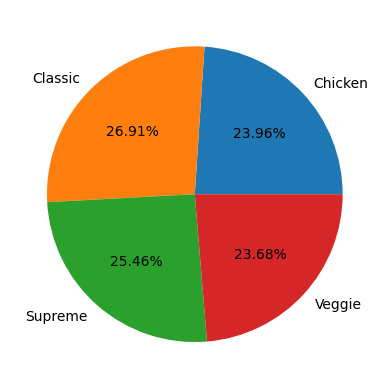

In [107]:
plt.pie( x= gb2['amount'], labels = gb2.index, autopct="%1.2f%%")
plt.show()

## Que 5. identify the time at which we are getting high orders and the time at which we are getting the lowest orders

In [50]:
orders

,order_id,date,time
0,1,2015-01-01,2023-12-05 11:38:36
1,2,2015-01-01,2023-12-05 11:57:40
2,3,2015-01-01,2023-12-05 12:12:28
3,4,2015-01-01,2023-12-05 12:16:31
4,5,2015-01-01,2023-12-05 12:21:30
...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07
21346,21347,2015-12-31,2023-12-05 21:14:37
21347,21348,2015-12-31,2023-12-05 21:23:10
21348,21349,2015-12-31,2023-12-05 22:09:54


In [54]:
orders["hour"] = orders["time"].dt.strftime("%H")
orders

,order_id,date,time,hour
0,1,2015-01-01,2023-12-05 11:38:36,11
1,2,2015-01-01,2023-12-05 11:57:40,11
2,3,2015-01-01,2023-12-05 12:12:28,12
3,4,2015-01-01,2023-12-05 12:16:31,12
4,5,2015-01-01,2023-12-05 12:21:30,12
...,...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07,20
21346,21347,2015-12-31,2023-12-05 21:14:37,21
21347,21348,2015-12-31,2023-12-05 21:23:10,21
21348,21349,2015-12-31,2023-12-05 22:09:54,22


In [58]:
gb2= orders.groupby("hour").agg({"order_id":"count"})
gb2

,order_id
hour,
09,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


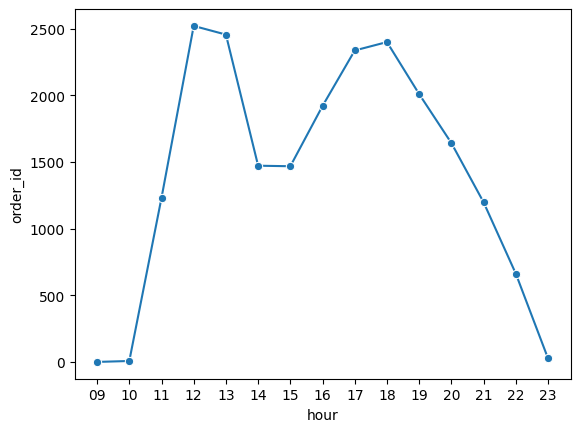

In [60]:
sns.lineplot(x=gb2.index, y = gb2["order_id"], marker = "o")
plt.show()

In [62]:
max = gb2["order_id"].idxmax()
min = gb2["order_id"].idxmin()
print("Bussiest hour is:",max)
print("Idle hour is:",min)

Bussiest hour is: 12
Idle hour is: 09


## Que 6. identify which day of the week we are getting the most orders.

In [66]:
orders["weekday"] = orders["date"].dt.strftime("%A")
orders

,order_id,date,time,hour,weekday
0,1,2015-01-01,2023-12-05 11:38:36,11,Thursday
1,2,2015-01-01,2023-12-05 11:57:40,11,Thursday
2,3,2015-01-01,2023-12-05 12:12:28,12,Thursday
3,4,2015-01-01,2023-12-05 12:16:31,12,Thursday
4,5,2015-01-01,2023-12-05 12:21:30,12,Thursday
...,...,...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07,20,Thursday
21346,21347,2015-12-31,2023-12-05 21:14:37,21,Thursday
21347,21348,2015-12-31,2023-12-05 21:23:10,21,Thursday
21348,21349,2015-12-31,2023-12-05 22:09:54,22,Thursday


In [68]:
gb3 = orders.groupby("weekday").agg({"order_id": "count"})
gb3

,order_id
weekday,
Friday,3538
Monday,2794
Saturday,3158
Sunday,2624
Thursday,3239
Tuesday,2973
Wednesday,3024


<Axes: xlabel='weekday', ylabel='count'>

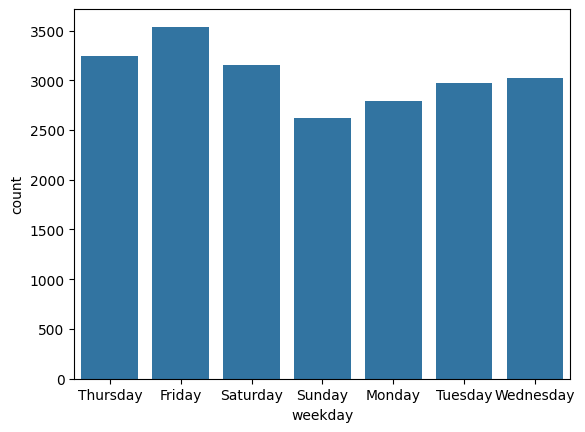

In [74]:
sns.countplot(x = "weekday",data = orders)

## Que 7 Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)

In [76]:
orders

,order_id,date,time,hour,weekday
0,1,2015-01-01,2023-12-05 11:38:36,11,Thursday
1,2,2015-01-01,2023-12-05 11:57:40,11,Thursday
2,3,2015-01-01,2023-12-05 12:12:28,12,Thursday
3,4,2015-01-01,2023-12-05 12:16:31,12,Thursday
4,5,2015-01-01,2023-12-05 12:21:30,12,Thursday
...,...,...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07,20,Thursday
21346,21347,2015-12-31,2023-12-05 21:14:37,21,Thursday
21347,21348,2015-12-31,2023-12-05 21:23:10,21,Thursday
21348,21349,2015-12-31,2023-12-05 22:09:54,22,Thursday


In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
 3   hour      21350 non-null  object        
 4   weekday   21350 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 834.1+ KB


In [80]:
orders["hour"] = orders["hour"].astype("int")

In [82]:
orders.loc[(orders["hour"]<12),"shift"]= "morning"
orders.loc[((orders["hour"]>=12)&(orders["hour"]<16)),"shift"]= "afternoon"
orders.loc[((orders["hour"]>=16)&(orders["hour"]<21)),"shift"]= "evening"
orders.loc[((orders["hour"]>=21)&(orders["hour"]<24)),"shift"]= "night"
orders

,order_id,date,time,hour,weekday,shift
0,1,2015-01-01,2023-12-05 11:38:36,11,Thursday,morning
1,2,2015-01-01,2023-12-05 11:57:40,11,Thursday,morning
2,3,2015-01-01,2023-12-05 12:12:28,12,Thursday,afternoon
3,4,2015-01-01,2023-12-05 12:16:31,12,Thursday,afternoon
4,5,2015-01-01,2023-12-05 12:21:30,12,Thursday,afternoon
...,...,...,...,...,...,...
21345,21346,2015-12-31,2023-12-05 20:51:07,20,Thursday,evening
21346,21347,2015-12-31,2023-12-05 21:14:37,21,Thursday,night
21347,21348,2015-12-31,2023-12-05 21:23:10,21,Thursday,night
21348,21349,2015-12-31,2023-12-05 22:09:54,22,Thursday,night


<Axes: xlabel='shift', ylabel='count'>

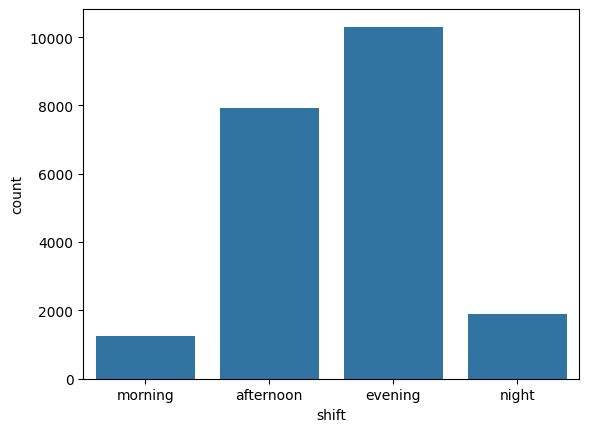

In [83]:
sns.countplot(x = "shift",data = orders)